## The Building Data Genome Project

In this notebook i am using a dataset from the Building Data Genome Project:

https://github.com/buds-lab/the-building-data-genome-project

![alt text](https://raw.githubusercontent.com/buds-lab/the-building-data-genome-project/master/figures/buildingdatagenome1.png)

This project is a set of 500+ time-series meter data from buildings -- check out the website which includes an overview of the data set, sources, and publications that use the data set. 

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/3 - Construction - Pandas Fundamentals/meter_data/")

In [4]:
abigail = pd.read_csv('Office_Abigail.csv', index_col = "timestamp") 

In [5]:
abigail.head()

,Office_Abigail
timestamp,
2015-01-01 00:00:00,5.33
2015-01-01 01:00:00,5.41
2015-01-01 02:00:00,5.60
2015-01-01 03:00:00,6.50
2015-01-01 04:00:00,5.39


In [6]:
abigail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abigail  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9+ KB


In [7]:
abigail.index[0]

'2015-01-01 00:00:00'

In [8]:
abigail = pd.read_csv('Office_Abigail.csv', index_col = "timestamp", parse_dates=True) 

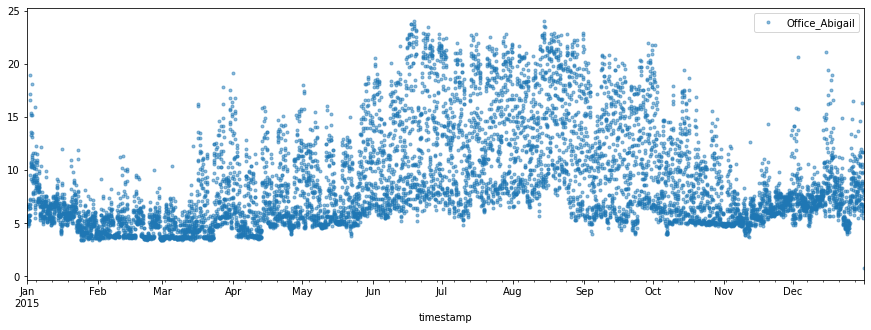

In [11]:
abigail.plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 5))

In [12]:
abigail_daily = abigail.resample("D").mean()

In [13]:
abigail_daily.head()

,Office_Abigail
timestamp,
2015-01-01,5.533750
2015-01-02,10.226771
2015-01-03,10.439167
2015-01-04,9.073333
2015-01-05,8.677500


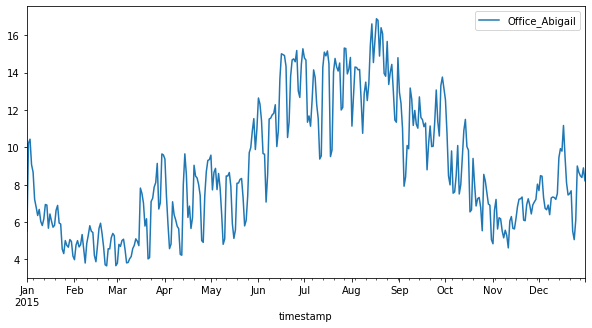

In [14]:
abigail_daily.plot(figsize=(10,5))

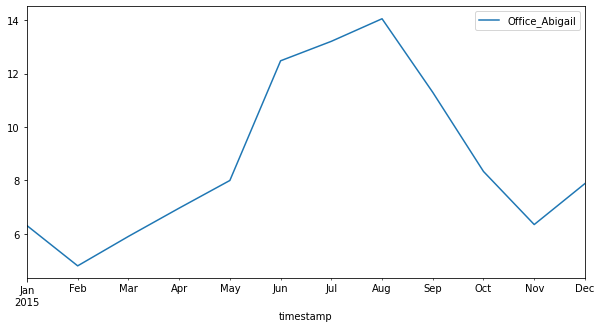

In [15]:
abigail_daily.resample("M").mean().plot(figsize=(10,5))

In [17]:
abigail_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Office_Abigail  365 non-null    float64
dtypes: float64(1)
memory usage: 15.7 KB


In [16]:
abigail_daily_june = abigail_daily.truncate(before = '2015-06-01', after='2015-07-01')

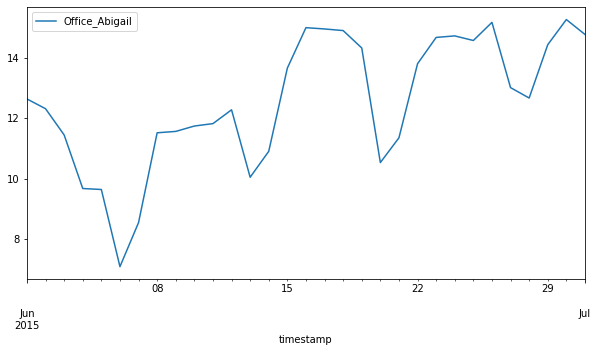

In [18]:
abigail_daily_june.plot(figsize=(10,5))

# Trends Analysis and Rolling Windows


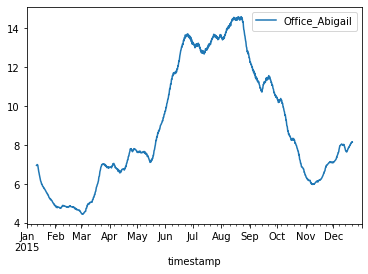

In [19]:
abigail.rolling(window=500, center=True, min_periods=500).mean().plot()

# Analysis of a large number of buildings at once


In [20]:
os.listdir()

['Office_Abigail.gsheet',
 'Office_Al.csv',
 'Office_Andrea.csv',
 'Office_Annika.csv',
 'Office_Angelica.csv',
 'Office_Angelo.csv',
 'Office_Angelina.csv',
 'Office_Ashanti.csv',
 'Office_Allyson.csv',
 'Office_Alyson.csv',
 'Office_Aliyah.csv',
 'Office_Anastasia.csv',
 'Office_Abbey.csv',
 'Office_Abigail.csv',
 'Office_Alannah.csv',
 'Office_Amelia.csv',
 'Office_Amelie.csv',
 'Office_Aubrey.csv',
 'Office_Autumn.csv',
 'Office_Asher.csv',
 'Office_Penny.csv',
 'Office_Cecelia.csv',
 'Office_Phebian.csv',
 'Office_Ayden.csv',
 'Office_Pam.csv',
 'Office_Ayesha.csv',
 'Office_Benjamin.csv',
 'Office_Ava.csv',
 'PrimClass_Angel.csv',
 'Office_Benthe.csv',
 'Office_Bianca.csv',
 'Office_Caleb.csv',
 'Office_Bryon.csv',
 'PrimClass_Eoghan.csv',
 'PrimClass_Esmeralda.csv',
 'Office_Bobbi.csv',
 'Office_Brian.csv',
 'Office_Carissa.csv',
 'Office_Carolina.csv',
 'Office_Catherine.csv',
 'Office_Cameron.csv',
 'Office_Charles.csv',
 'Office_Clinton.csv',
 'Office_Clarissa.csv',
 'Office_

In [21]:
list_of_buildings = ['UnivClass_Andy.csv',
'Office_Abbey.csv',
'Office_Alannah.csv',
'PrimClass_Angel.csv',
'Office_Penny.csv',
'Office_Pam.csv',
'UnivClass_Craig.csv',
'UnivLab_Allison.csv',
'Office_Amelia.csv',
'Office_Aubrey.csv',
'Office_Cecelia.csv',
'UnivClass_Conor.csv',
'Office_Autumn.csv',
'Office_Abigail.csv',
'Office_Amelie.csv',
'UnivClass_Alfredo.csv',
'Office_Phebian.csv',
'UnivLab_Adrian.csv',
'UnivDorm_Curtis.csv',
'UnivLab_Angie.csv',
'UnivClass_Amya.csv',
'UnivDorm_Cian.csv',
'UnivClass_Ciara.csv',
'UnivLab_Audra.csv',
'UnivLab_Ciel.csv',
'UnivLab_Cesar.csv']

In [22]:
all_data_list = []
for buildingname in list_of_buildings:
  df = pd.read_csv(buildingname, index_col = "timestamp", parse_dates=True) 
  df = df.resample("H").mean()
  all_data_list.append(df)
all_data = pd.concat(all_data_list, axis=1)

In [23]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Freq: H
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UnivClass_Andy     8760 non-null   float64
 1   Office_Abbey       8760 non-null   float64
 2   Office_Alannah     8760 non-null   float64
 3   PrimClass_Angel    8760 non-null   float64
 4   Office_Penny       8759 non-null   float64
 5   Office_Pam         8759 non-null   float64
 6   UnivClass_Craig    8759 non-null   float64
 7   UnivLab_Allison    8760 non-null   float64
 8   Office_Amelia      8760 non-null   float64
 9   Office_Aubrey      8760 non-null   float64
 10  Office_Cecelia     8759 non-null   float64
 11  UnivClass_Conor    8759 non-null   float64
 12  Office_Autumn      8760 non-null   float64
 13  Office_Abigail     8760 non-null   float64
 14  Office_Amelie      8760 non-null   float64
 15  UnivClass_Alfredo  8760 non-

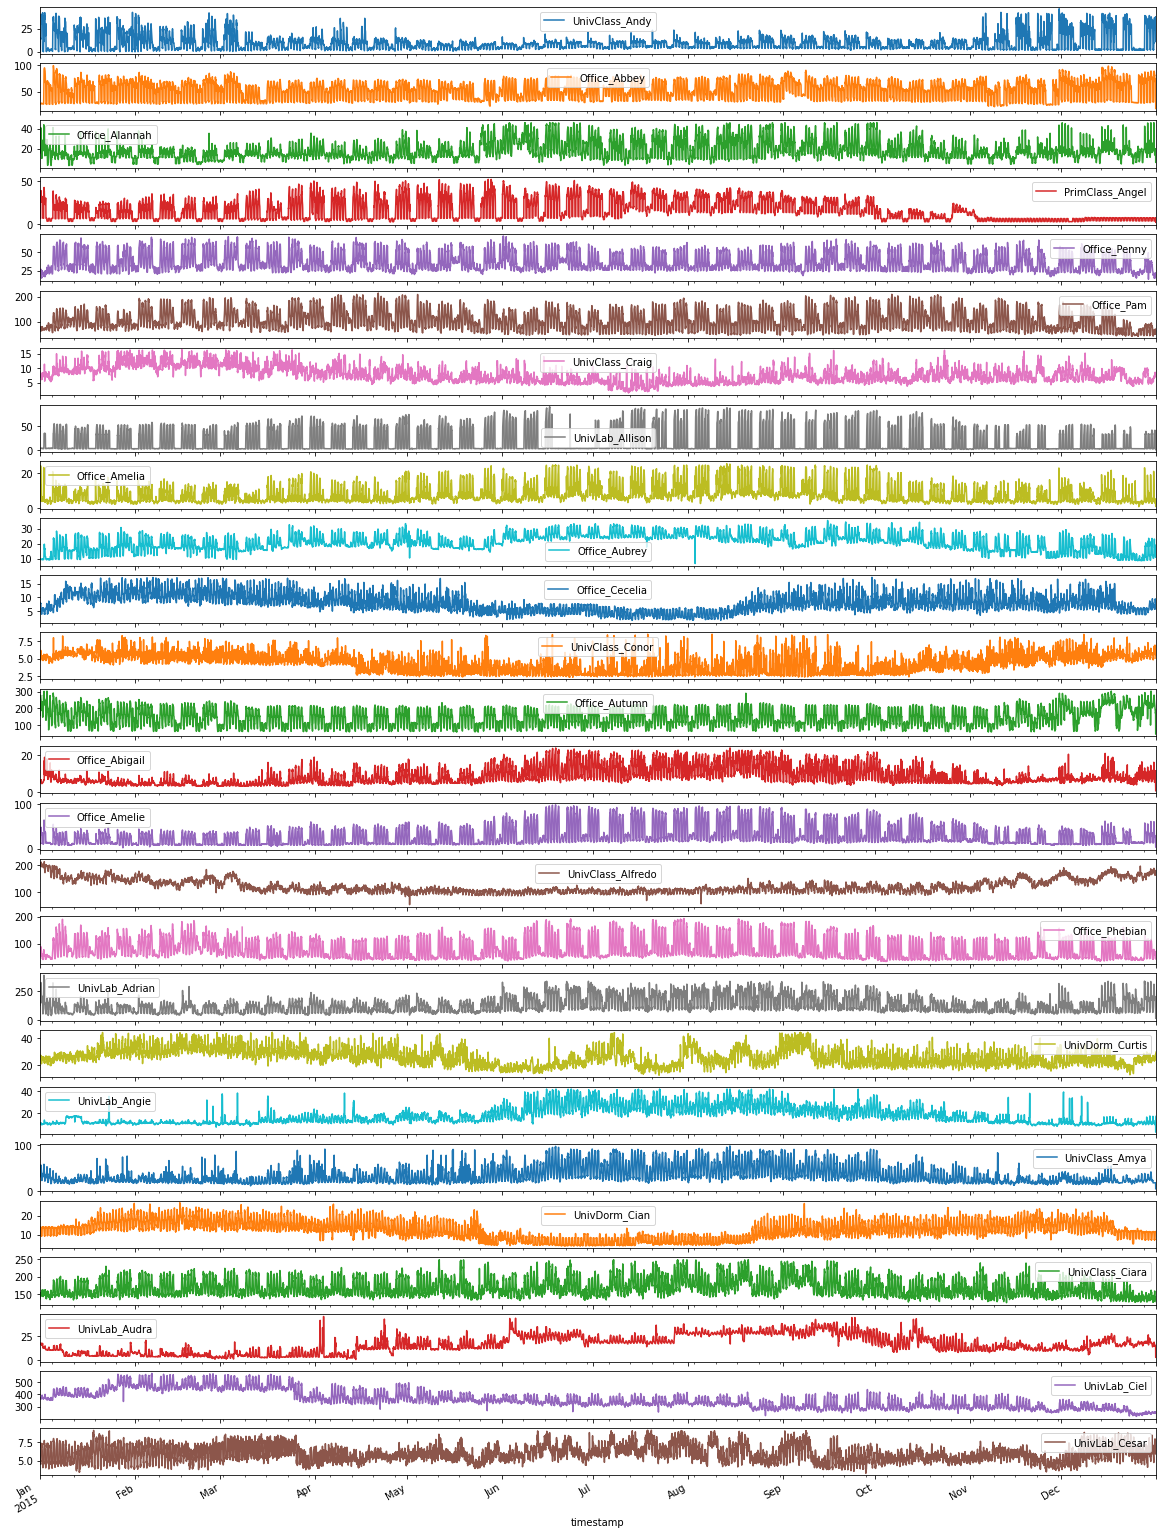

In [24]:
all_data.plot(figsize=(20,30), subplots=True);

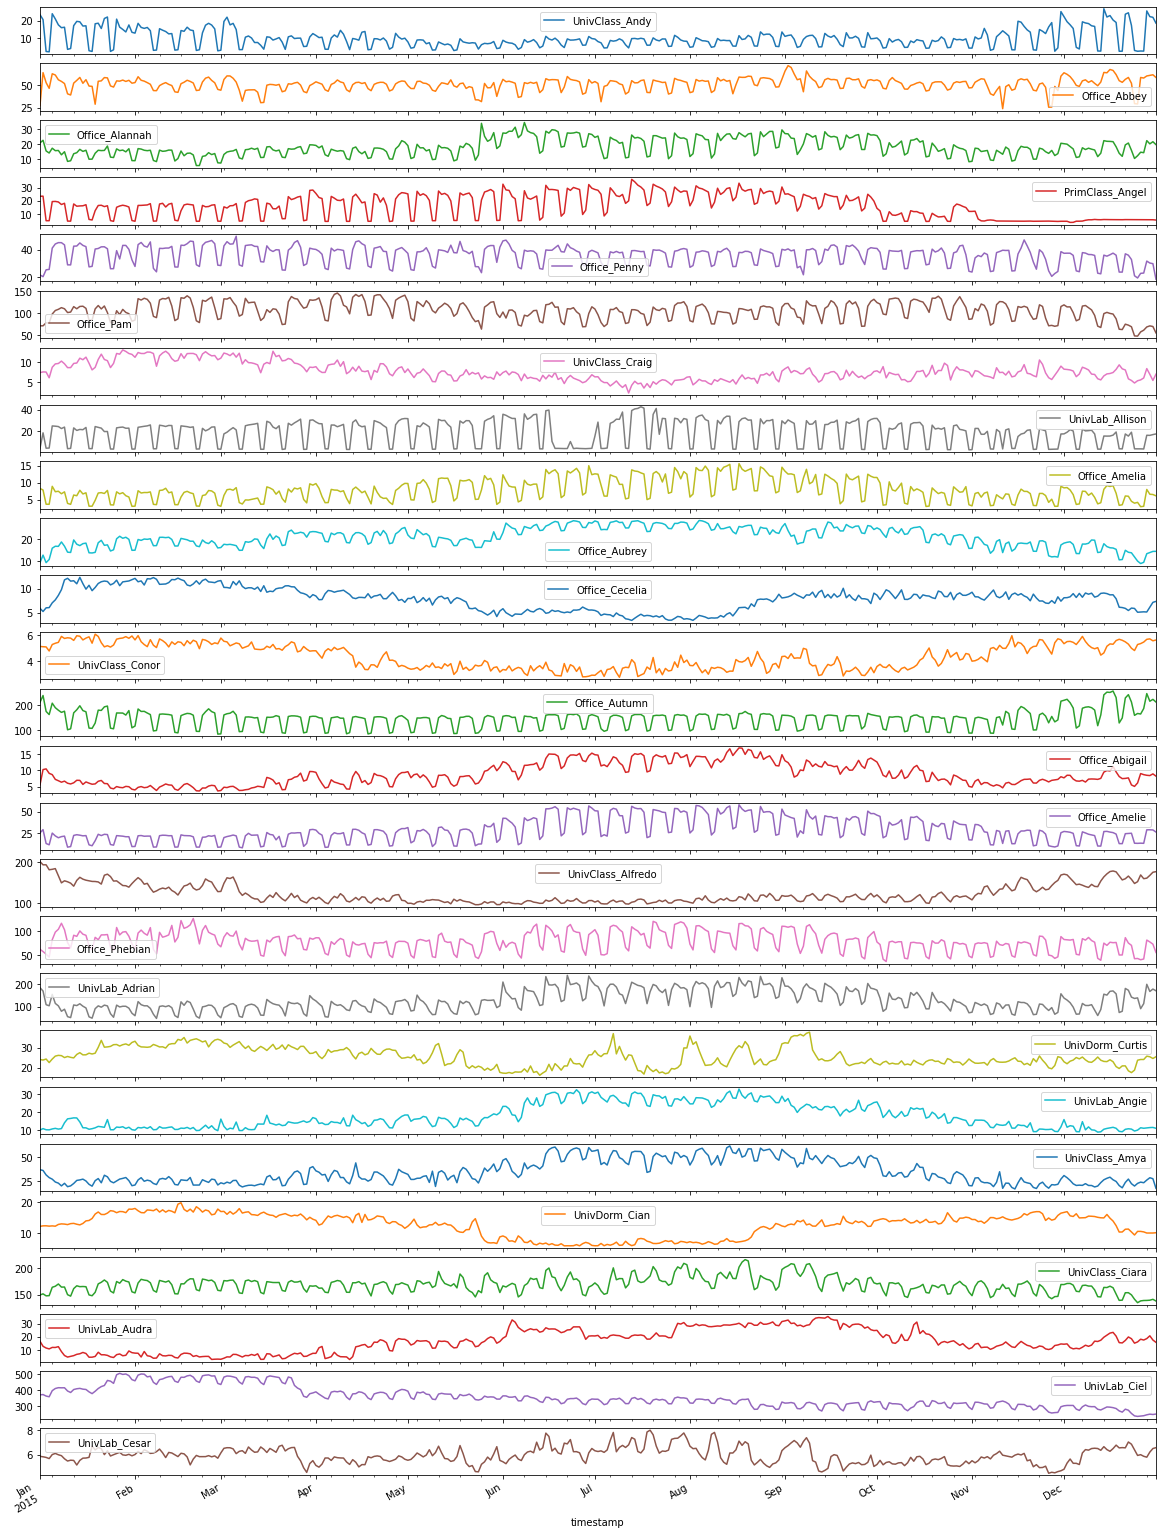

In [25]:
all_data.resample("D").mean().plot(figsize=(20,30), subplots=True);

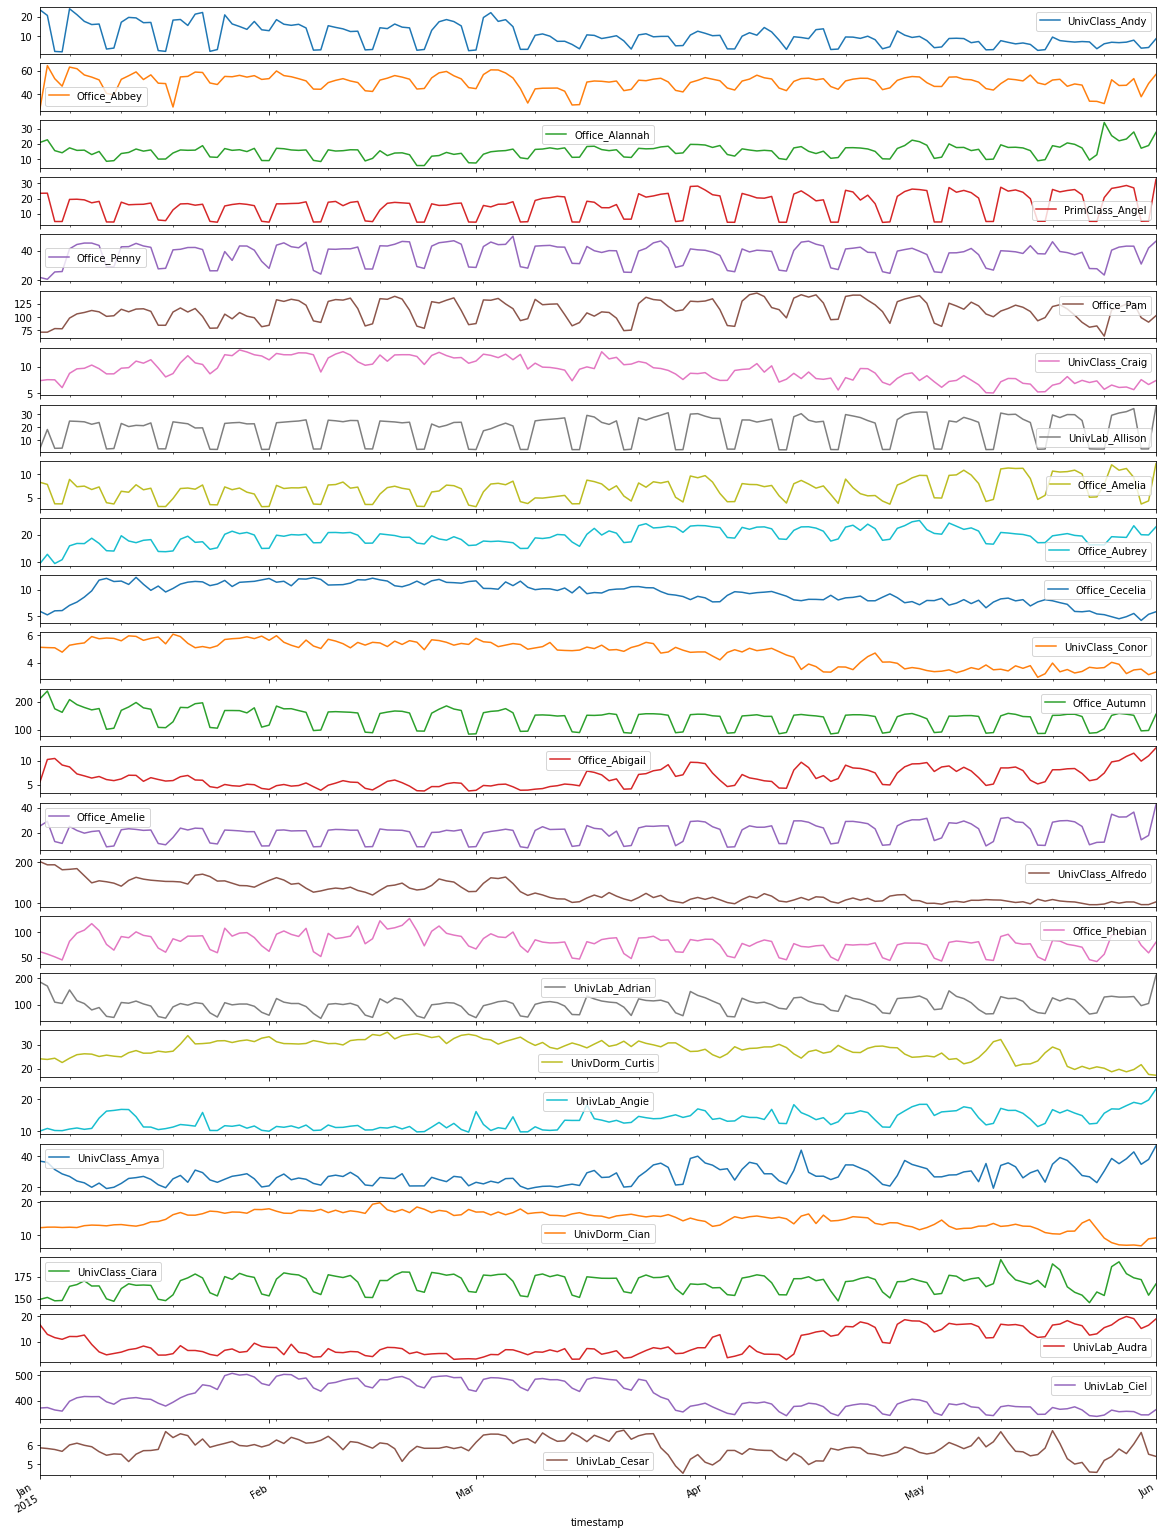

In [26]:
all_data.resample("D").mean().truncate(after='2015-06-01').plot(figsize=(20,30), subplots=True);